### Lab Session 03


In [1]:
import librosa

y, sr = librosa.load("SpeechRec.wav")

In [2]:
from IPython.display import Audio

Audio(data=y, rate=sr)

In [3]:
librosa.get_duration(y=y, sr=sr)

3.029342403628118

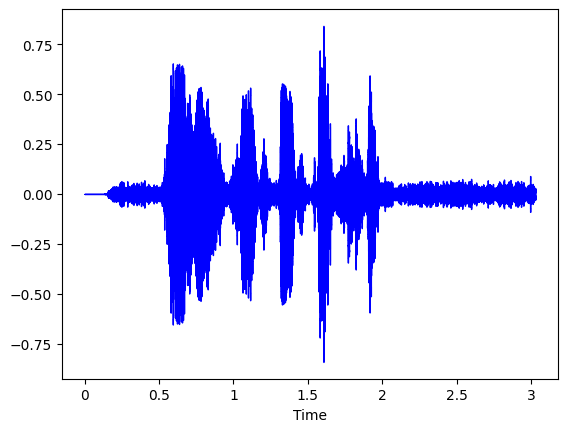

In [4]:
librosa.display.waveshow(y,color = 'blue')

In [5]:
yt, index = librosa.effects.trim(y)

In [6]:
Audio(data=yt, rate=sr)

In [7]:
librosa.get_duration(y=yt, sr=sr)

2.9132426303854877

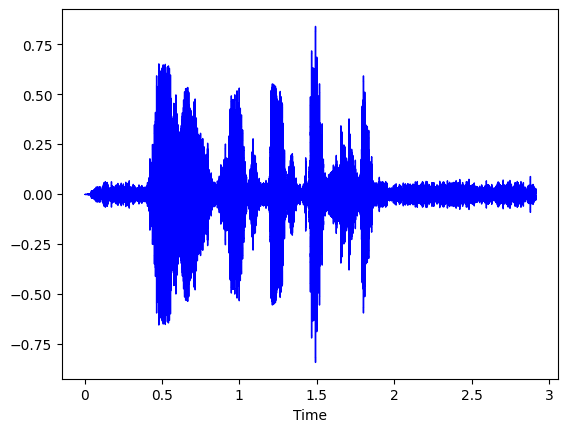

In [8]:
librosa.display.waveshow(yt,color = 'blue')

In [9]:
nonmutesections=librosa.effects.split(y,top_db=10)
nonmutesections

array([[11776, 19968],
       [22528, 26112],
       [28160, 31744],
       [34304, 37376],
       [38912, 44032]])

In [10]:
segment = y[11776:19968]
Audio(segment,rate=sr)

In [15]:
import matplotlib.pyplot as plt


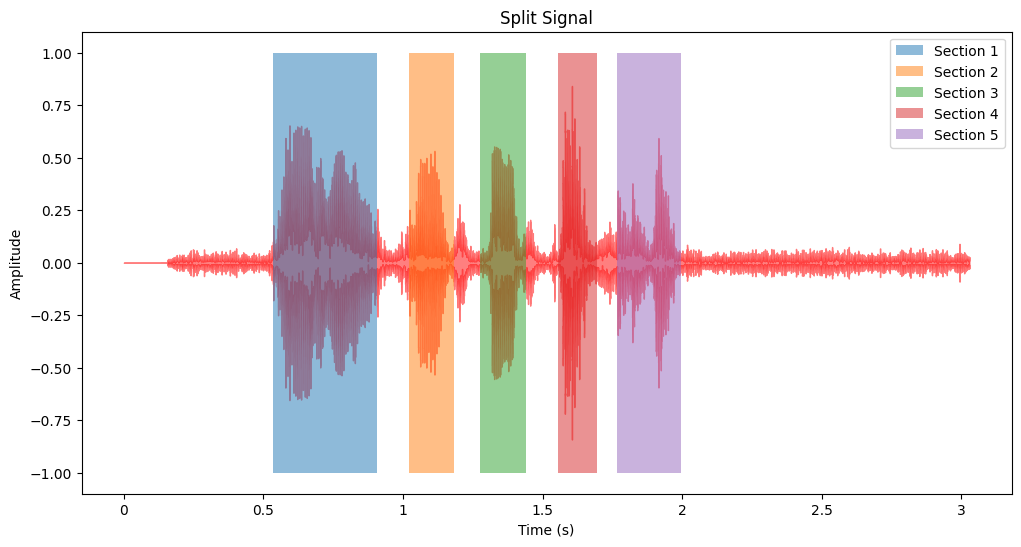

In [30]:
sections = librosa.effects.split(y, top_db=10)

# Plot the split signal
plt.figure(figsize=(12, 6))
librosa.display.waveshow(y, sr=sr, alpha=0.5, color="red")
for i, section in enumerate(sections):
    plt.fill_betweenx([-1, 1], section[0]/sr, section[1]/sr, alpha=0.5, label=f'Section {i+1}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Split Signal')
plt.legend()
plt.show()

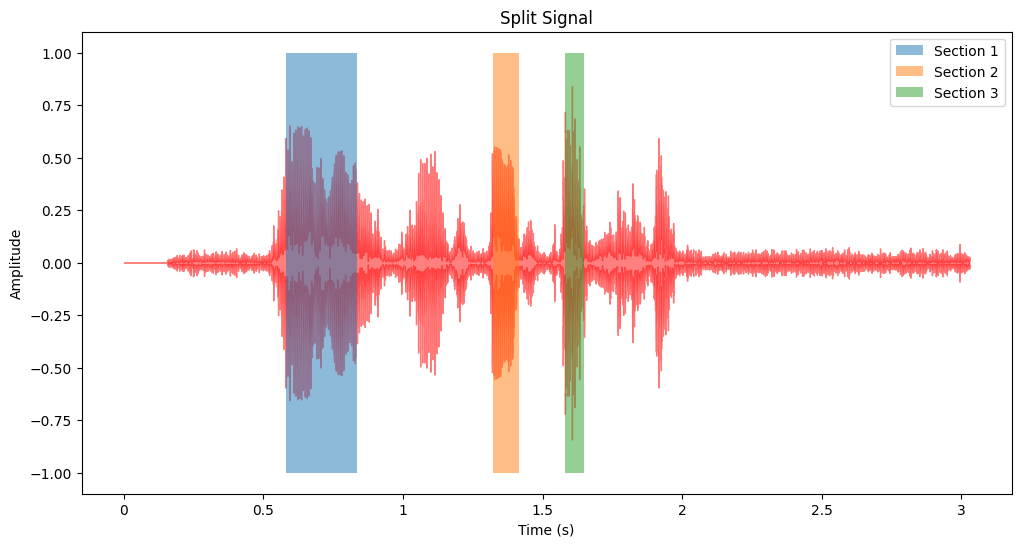

In [44]:
sections = librosa.effects.split(y, top_db=3)

# Plot the split signal
plt.figure(figsize=(12, 6))
librosa.display.waveshow(y, sr=sr, alpha=0.5, color="red")
for i, section in enumerate(sections):
    plt.fill_betweenx([-1, 1], section[0]/sr, section[1]/sr, alpha=0.5, label=f'Section {i+1}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Split Signal')
plt.legend()
plt.show()

In [17]:
N = 1102 # number of samples taken in 50 ms. 1s -> 22050 samples. 50 ms -> 1102 samples
Ek = []  #continuos average energy
for k in range(len(y)-N+1):
    sum = 0
    for i in range(k,N+k):
        sum += y[i]*y[i]
    Ek.append((1/N)*sum)

In [18]:
import numpy as np
Ek_arr = np.array(Ek)
print(Ek_arr)

[0.         0.         0.         ... 0.00051183 0.00051204 0.00051208]


In [19]:
import statistics
Em = []
mean = statistics.mean(Ek_arr)
var = statistics.variance(Ek_arr)
for i in range(len(Ek_arr)):
    Em.append((Ek_arr[i] - mean)/var)
Em_arr = np.array(Em)

In [20]:
print(Em_arr)


[-29.66278177 -29.66278177 -29.66278177 ... -28.35136082 -28.35081424
 -28.35071605]


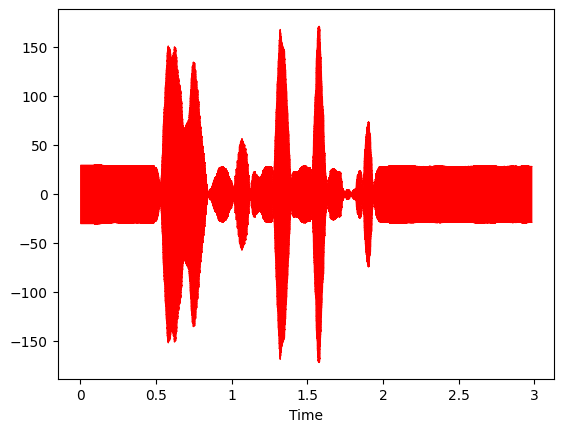

In [21]:
librosa.display.waveshow(Em_arr,color = 'red')

In [22]:
Audio(Em_arr,rate = sr)

In [23]:
zero_crossings = librosa.zero_crossings(Em_arr, pad=False)

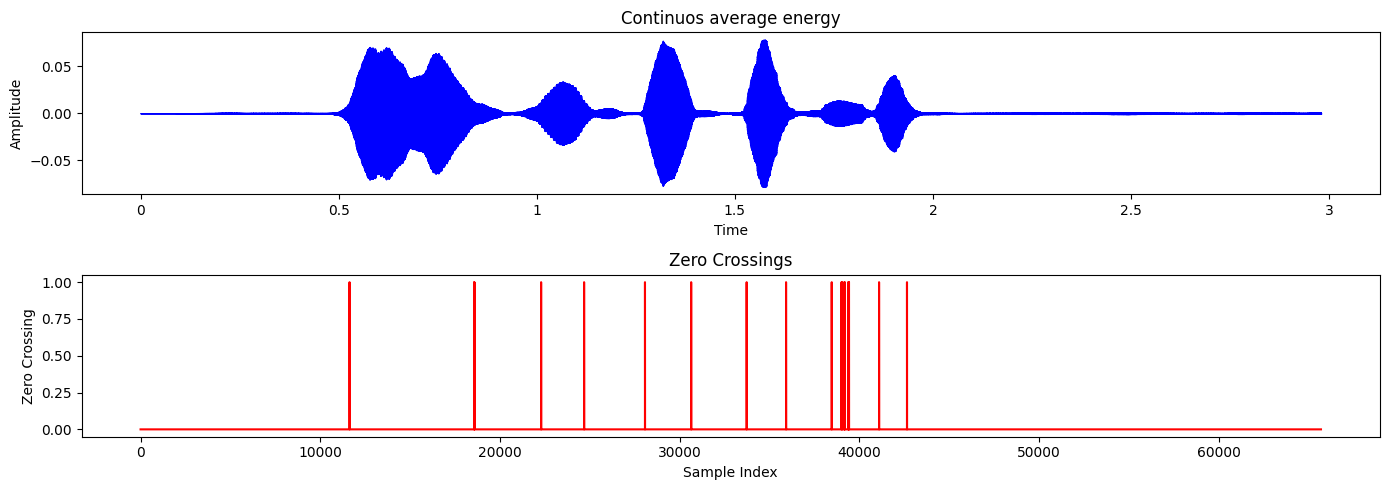

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.subplot(2, 1, 1)
librosa.display.waveshow(Ek_arr, sr=sr, color="blue")
plt.title('Continuos average energy')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot the zero crossings
plt.subplot(2, 1, 2)
plt.plot(zero_crossings, color='r')
plt.title('Zero Crossings')
plt.xlabel('Sample Index')
plt.ylabel('Zero Crossing')
plt.tight_layout()
plt.show()

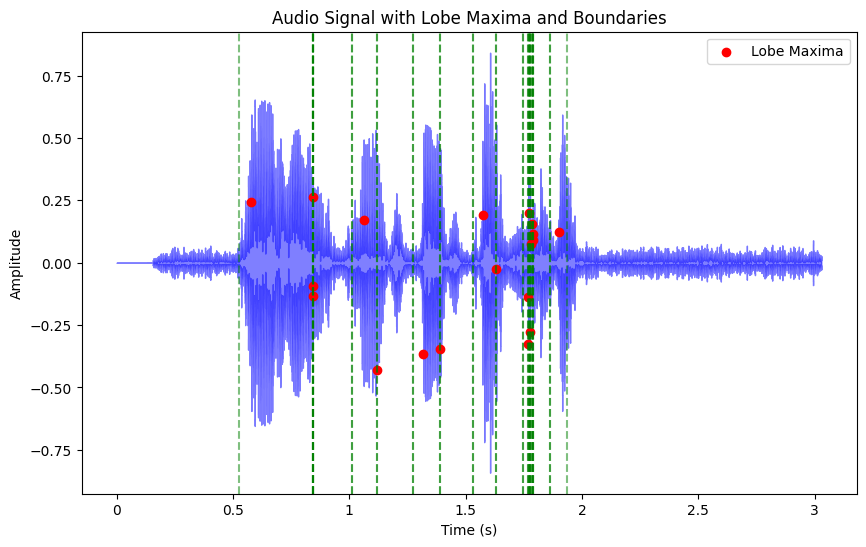

In [59]:
zero_crossings_Energy = np.where(np.diff(np.sign(Em_arr)))[0]
lobe_maxima_indices = []
lobe_boundaries = []

for i in range(len(zero_crossings_Energy) - 1):
    lobe_start = zero_crossings_Energy[i]
    lobe_end = zero_crossings_Energy[i + 1]
    

    lobe_max_index = lobe_start + np.argmax(Em_arr[lobe_start:lobe_end])
    
    lobe_maxima_indices.append(lobe_max_index)
    
    lobe_boundaries.append((lobe_start, lobe_end))

plt.figure(figsize=(10, 6))
librosa.display.waveshow(y, sr=sr, alpha=0.5, color="blue")

lobe_maxima_times = librosa.samples_to_time(lobe_maxima_indices, sr=sr)
lobe_boundaries_times = librosa.samples_to_time(np.array(lobe_boundaries).flatten(), sr=sr)

plt.scatter(lobe_maxima_times, y[lobe_maxima_indices], color='r', label='Lobe Maxima')

for start, end in zip(lobe_boundaries_times[::2], lobe_boundaries_times[1::2]):
    plt.axvline(x=start, color='g', linestyle='--', alpha=0.5)
    plt.axvline(x=end, color='g', linestyle='--', alpha=0.5)

plt.title('Audio Signal with Lobe Maxima and Boundaries')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()